In [1]:
import json
import pandas as pd

In [11]:
def read_json_lines(file_name):
    lines = []
    with open(file_name) as file_in:
        for line in file_in:
            lines.append(json.loads(line))
    return lines

def write_json_lines(file_name,dict_data):
    json_string = json.dumps(dict_data)
    with open(file_name, 'a') as f:
        f.write(json_string+"\n")

def get_train_res():
    all_res = []
    impo_hp = ['b_size', 'dataset', 'emb_dim', 'lr', 'margin', 'model_name', 'n_neg']
    res = read_json_lines('TDYCE_experiments_log.jsonl')
    for i in res:
        result = i['train_params']
        result = {hp:result[hp] for hp in impo_hp}
        result.update(i['test_results'])
        all_res.append(result)
    return pd.DataFrame(all_res)

def get_dataset_insight(df_, dataset):
    hps = ['b_size','emb_dim','lr','margin', 'n_neg']
    datares_res = df_[df_['dataset']==dataset]
    best_ = datares_res[datares_res['filt_mrr']==datares_res['filt_mrr'].min()]
    best_metrics = ['filt_mrr', 'filt_hit_1', 'filt_hit_3', 'filt_hit_10']
    display(best_[best_metrics])
    display(best_[hps])
    for main_hp in hps:
        fix_hp_res = datares_res.copy()
        fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
        fix_hp_res_ = fix_hp_res_.reset_index()
        fix_hp_res_.plot(x=main_hp, y='filt_mrr', kind='line', title = 'dataset: {} |main hp: {}'.format(dataset, main_hp))
 

In [3]:
# read_json_lines('TDYCE_experiments_log.jsonl')

In [4]:
get_train_res()

,b_size,dataset,emb_dim,lr,margin,model_name,n_neg,hit_1,filt_hit_1,hit_2,...,hit_10,filt_hit_10,mr,filt_mr,head_mrr,tail_mrr,filt_head_mrr,filt_tail_mrr,mrr,filt_mrr
0,1000,icews14,100,0.001,200,TDYCE_Quat,5,0.314738,0.329968,0.421120,...,0.658039,0.661218,221.359650,221.182983,0.405214,0.454684,0.416942,0.466454,0.429949,0.441698
1,1000,icews14,100,0.010,200,TDYCE_Quat,5,0.306259,0.320819,0.418442,...,0.656923,0.659712,241.592651,241.420166,0.399479,0.448285,0.410022,0.460066,0.423882,0.435044
2,500,icews14,100,0.001,200,TDYCE_Quat,5,0.301406,0.315464,0.411246,...,0.648444,0.652125,216.233566,216.062531,0.393377,0.443870,0.404524,0.454268,0.418624,0.429396
3,500,icews14,100,0.010,200,TDYCE_Quat,5,0.299007,0.314181,0.408011,...,0.656588,0.659545,234.012497,233.841736,0.393112,0.442403,0.403909,0.453724,0.417757,0.428816
4,1000,icews14,100,0.001,100,TDYCE_Quat,5,0.310945,0.325840,0.414816,...,0.651233,0.654803,242.385925,242.211151,0.399584,0.449412,0.411123,0.460347,0.424498,0.435735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,500,icews15,500,0.001,10,TDYCE_Quat,1,0.302222,0.315890,0.410668,...,0.648160,0.650427,152.559570,152.436462,0.389886,0.446449,0.399109,0.455713,0.418167,0.427411
572,500,icews15,200,0.010,10,TDYCE_Quat,1,0.239695,0.247896,0.338432,...,0.585959,0.587683,215.329834,215.211578,0.322940,0.385167,0.328774,0.391577,0.354054,0.360176
573,500,icews15,300,0.010,10,TDYCE_Quat,1,0.207693,0.214408,0.319361,...,0.585904,0.587683,213.022034,212.902664,0.302084,0.364607,0.307648,0.370504,0.333346,0.339076
574,500,icews15,400,0.010,10,TDYCE_Quat,1,0.212076,0.218042,0.320489,...,0.585384,0.587195,213.293335,213.173706,0.306550,0.365188,0.311735,0.371068,0.335869,0.341402


In [5]:
res_df = get_train_res()

In [9]:
res_df['dataset'].unique()

array(['icews14', 'gdelt', 'icews15', 'wikidata12k'], dtype=object)

,filt_mrr,filt_hit_1,filt_hit_3,filt_hit_10
381,0.374431,0.268772,0.419056,0.58563


,b_size,emb_dim,lr,margin,n_neg
381,500,300,0.01,10,1


/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_9

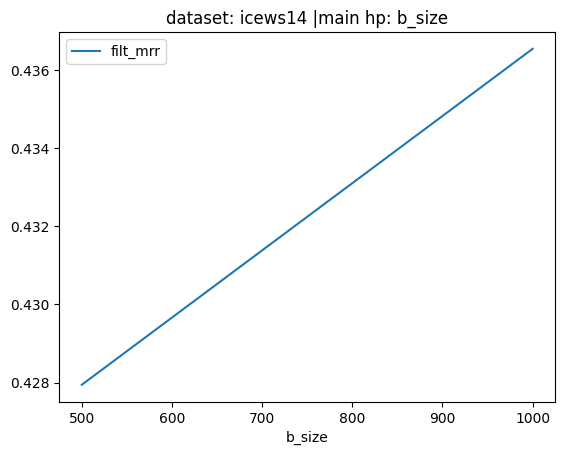

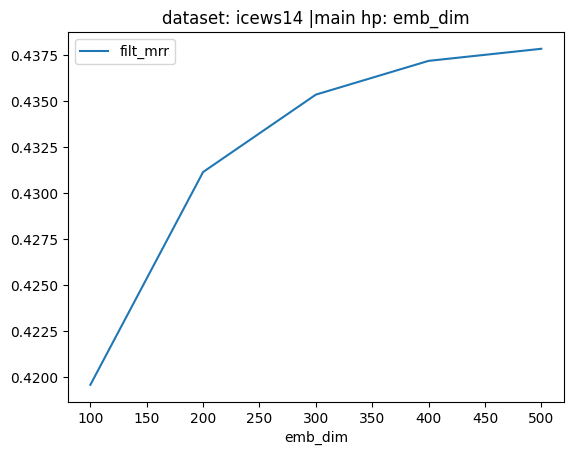

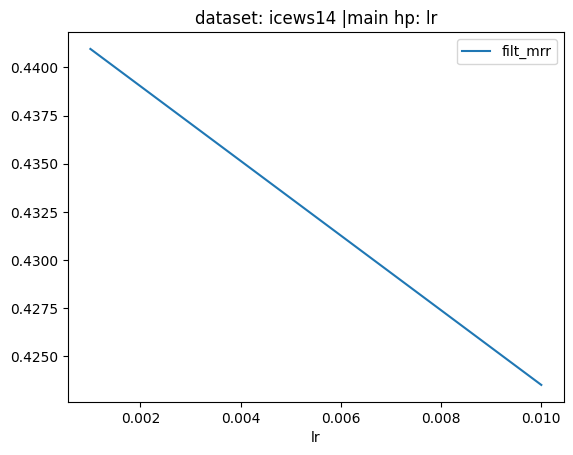

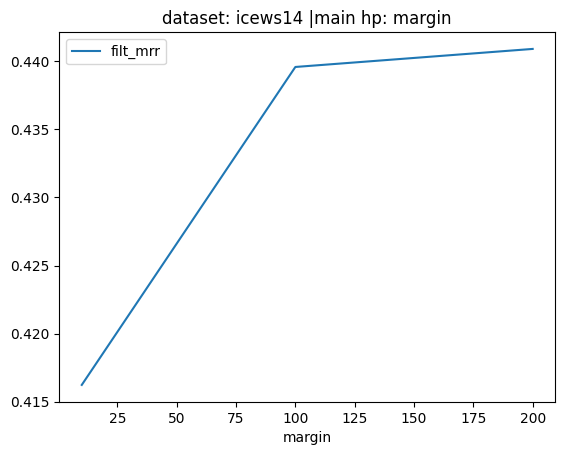

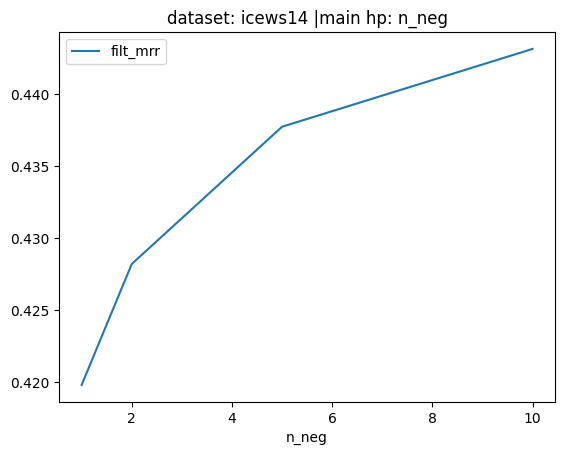

In [12]:
get_dataset_insight(res_df, 'icews14')

,filt_mrr,filt_hit_1,filt_hit_3,filt_hit_10
575,0.322319,0.193591,0.386097,0.574742


,b_size,emb_dim,lr,margin,n_neg
575,500,500,0.01,10,1


/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_9

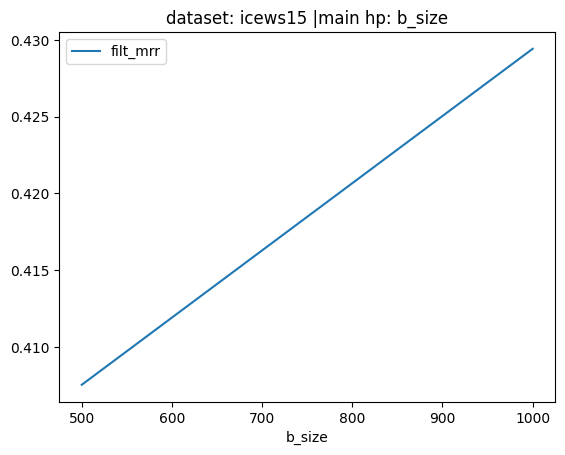

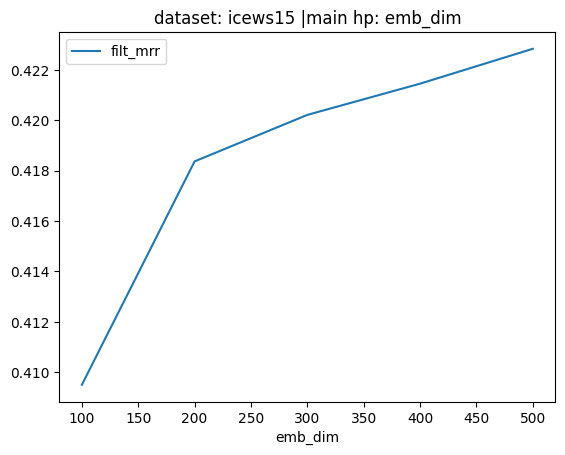

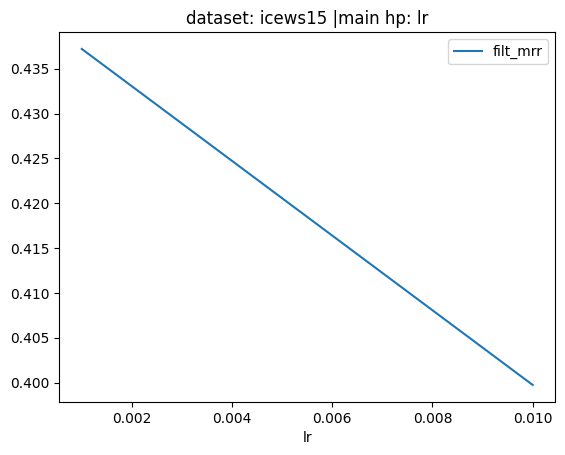

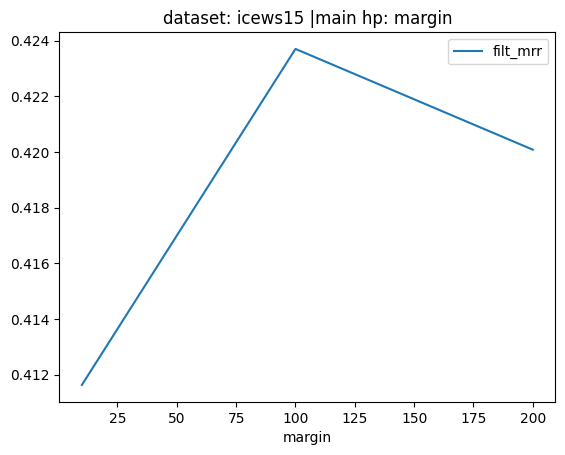

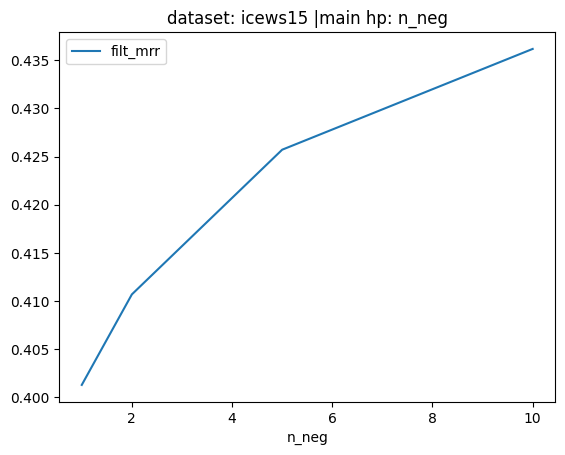

In [13]:
get_dataset_insight(res_df, 'icews15')

,filt_mrr,filt_hit_1,filt_hit_3,filt_hit_10
359,0.153365,0.071901,0.164061,0.310097


,b_size,emb_dim,lr,margin,n_neg
359,500,100,0.01,10,1


/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_991419/2555699125.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fix_hp_res_ = fix_hp_res.groupby(main_hp).mean()
/tmp/ipykernel_9

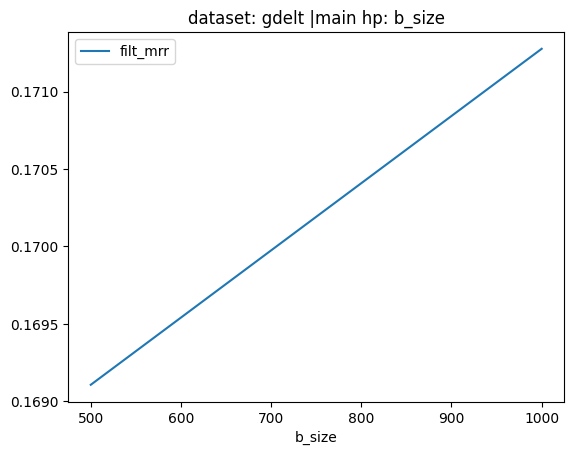

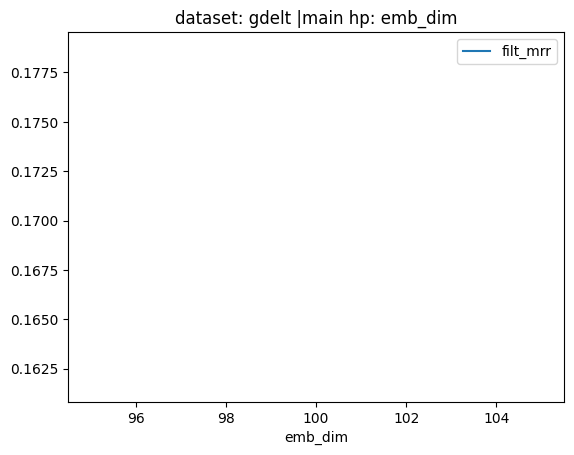

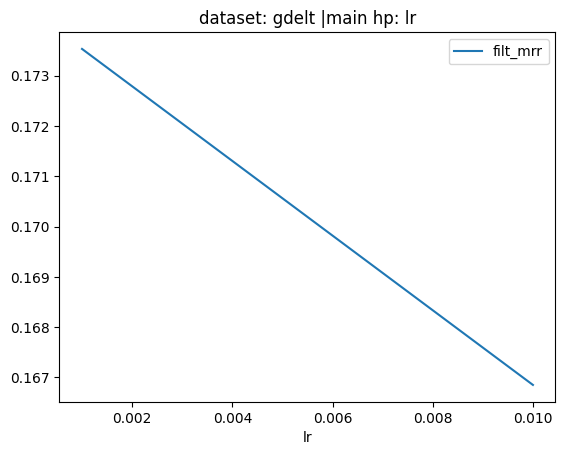

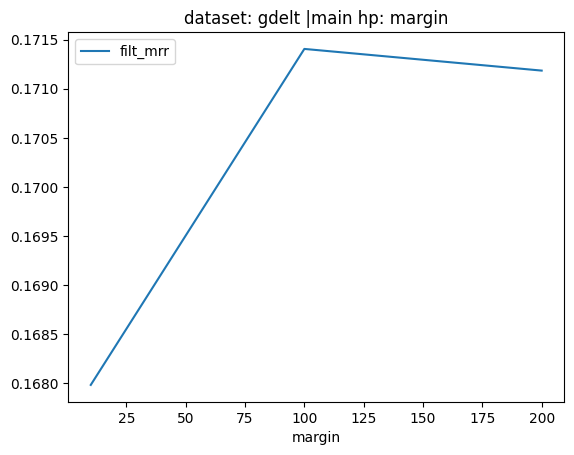

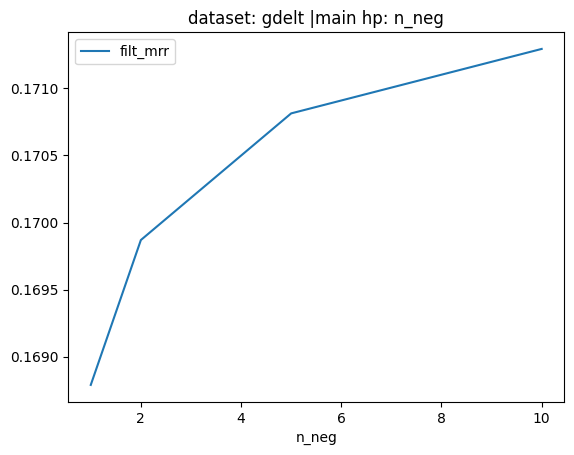

In [14]:
get_dataset_insight(res_df, 'gdelt')